In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option('display.max_columns',500)

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Nomor 1
a) Buatlah Histogram untuk menampilkan distribusi data harga rumah (kolom “Price”)!    
b) Tambahkan judul “Distribusi Harga Rumah” berukuran 15!     
c) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

C:\Users\algustie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


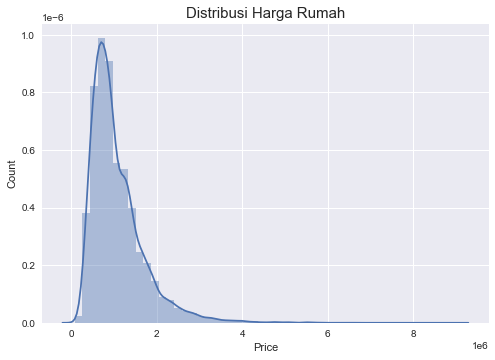

In [14]:
plt.style.use('seaborn')
sns.distplot(df['Price'], bins=50)
plt.title('Distribusi Harga Rumah', size=15)
plt.ylabel('Count')
plt.show()

# Nomor 2

a) Buatlah Box Plot untuk menampilkan distribusi data jarak ke CBD (kolom “Distance”)!  
b) Buatlah Box Plot “Distance” untuk tiap nama region (kolom “Regionname”)!  
c) Tambahkan judul ‘Distribusi Jarak ke CBD berdasarkan Nama Region’ berukuran 15!  
d) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

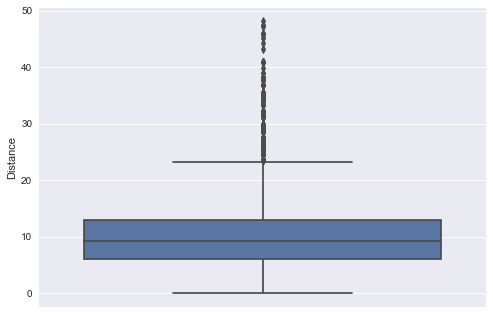

In [19]:
sns.boxplot(y=df['Distance'])
plt.show()

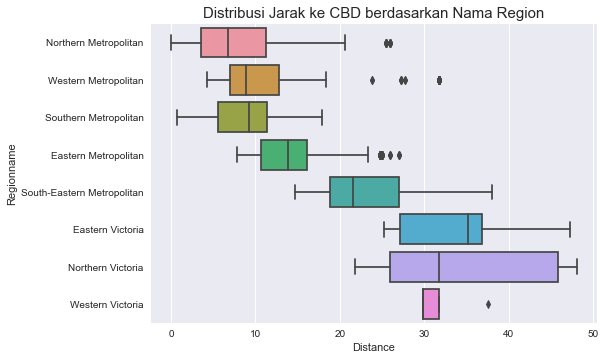

In [17]:
sns.boxplot(x='Distance', y='Regionname', data=df)
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region',size=15)
plt.show()

# Nomor 3
a) Buatlah Bar Plot (diagram batang) untuk membandingkan nilai median harga rumah (kolom “Price”) di tiap tipe rumah (kolom “Type”)!
b) Tambahkan judul ‘Perbandingan Nilai Median Harga Rumah’ berukuran 15!
c) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

In [29]:
df_median = df.groupby('Type')[['Type','Price']].median()
df_median

,Price
Type,
h,1080000.0
t,846750.0
u,560000.0


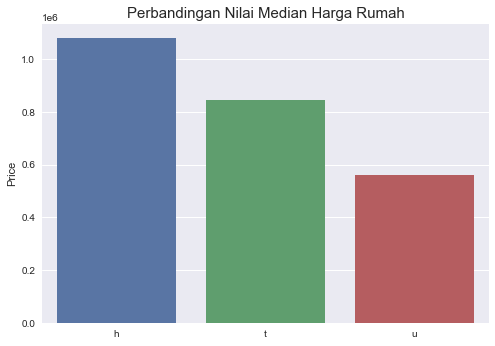

In [38]:
sns.barplot(data=df_median, x=(df_median.index.tolist()), y='Price')
plt.title('Perbandingan Nilai Median Harga Rumah', size=15)
plt.show()

# Nomor 4
a) Buatlah Scatter Plot (diagram titik) untuk menampilkan korelasi antara 
harga rumah (kolom “Price”) dengan Jarak ke CBD (kolom “Distance”)!
b) Bedakan warna titik berdasarkan tipe rumah (kolom “Type”)!
c) Tambahkan judul ‘Korelasi Harga Rumah dan Jarak Rumah ke CBD’ 
berukuran 15!
d) Tidak ada ketentuan pilihan ukuran dan library yang digunakan.

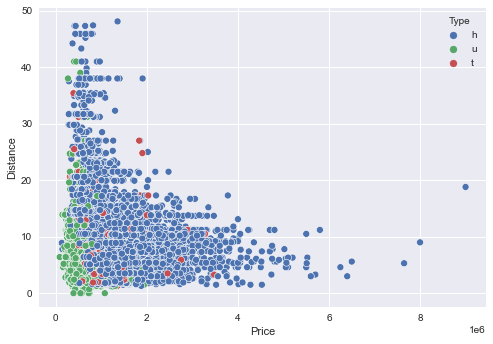

In [40]:
sns.scatterplot(data=df, x='Price', y='Distance', hue='Type')
plt.show()

# Nomor 5
a) Konversi kolom “Date” menjadi tipe data datetime64. Buatlah kolom baru 
bernama ‘Month’ hasil ekstraksi data bulan dari kolom “Date”!  
b) Buatlah Line Plot (diagram garis) untuk menampilkan tren perkembangan 
harga rumah (kolom “Price”) tiap bulan!  
c) Bedakan warna garis berdasarkan tipe rumah (kolom “Type”)!  
d) Tambahkan judul ‘Tren Harga Rumah per Bulan berdasarkan Tipe Rumah’ 
berukuran 15!  
e) Tidak ada ketentuan pilihan ukuran dan library yang digunakan.

In [41]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [47]:
df['Date'] = df['Date'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [48]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,3
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,4
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,4
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,4
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,4


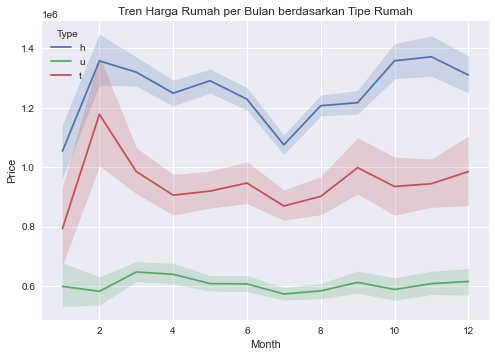

In [51]:
sns.lineplot(data=df, x='Month', y='Price', hue='Type')
plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah')
plt.show()

# Nomor 6
a) Kelompokkan total luas tanah (kolom “Landsize”) berdasarkan region (kolom 
“Regionname”), lalu simpan ke dalam sebuah DataFrame baru!
b) Dari DataFrame baru tersebut, buatlah Pie Chart (diagram lingkaran) untuk 
menampilkan proporsi total luas tanah di tiap region!
c) Tambahkan explode agar potongan diagram seakan terpisah!
d) Tambahkan judul ‘Proporsi Luas Tanah tiap Region’ berukuran 20!
e) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

In [55]:
df_landsize = df.groupby('Regionname')[['Landsize']].sum().reset_index()
df_landsize

,Regionname,Landsize
0,Eastern Metropolitan,932811.0
1,Eastern Victoria,156334.0
2,Northern Metropolitan,2213208.0
3,Northern Victoria,137574.0
4,South-Eastern Metropolitan,276296.0
5,Southern Metropolitan,2390939.0
6,Western Metropolitan,1455153.0
7,Western Victoria,20976.0


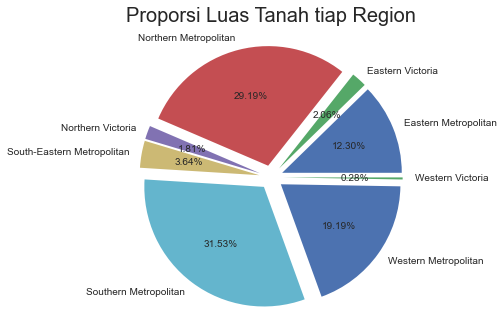

In [61]:
plt.pie(df_landsize['Landsize'],
       labels=df_landsize['Regionname'],
       autopct='%.2f%%',
       explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Proporsi Luas Tanah tiap Region',size=20)
plt.show()

# Nomor 7
a) Buatlah terlebih dahulu correlation matrix yang berisi korelasi kolom “Price”,“Distance”, “Landsize”, dan “Rooms”!  
b) Dari correlation matrix ini, buatlah Correlation Heatmap untuk 
memvisualisasikan korelasi antar variabel!  
c) Tampilkan data korelasi di heatmap (annot = True) !  
d) Tambahkan judul ‘Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah 
Kamar’ berukuran 20!  
e) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

In [62]:
corr_matrix=df[['Price','Distance','Landsize','Rooms']].corr()
corr_matrix

,Price,Distance,Landsize,Rooms
Price,1.000000,-0.162522,0.037507,0.496634
Distance,-0.162522,1.000000,0.025004,0.294203
Landsize,0.037507,0.025004,1.000000,0.025678
Rooms,0.496634,0.294203,0.025678,1.000000


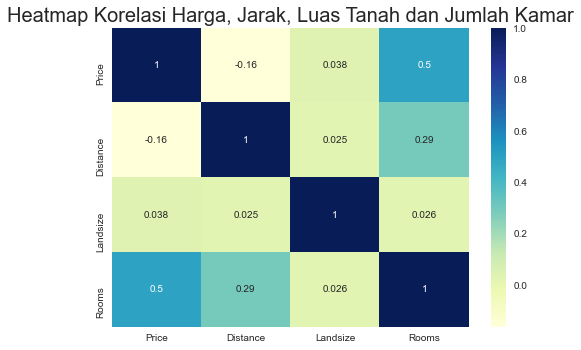

In [86]:
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar',size=20)
plt.show()

# Nomor 8
a) Urutkan data berdasarkan harga (kolom “Price”) dan tampilkan 10 data dari 
harga rumah tertinggi, kemudian simpan hasilnya ke dalam DataFrame baru!
b) Buatlah peta Melbourne yang berlokasi di [-37.8136, 144.9631] dan 
zoom_start = 11!
c) Di dalam peta Melbourne, tambahkan 10 marker sesuai lokasi 10 rumah 
dengan harga tertinggi!
d) Di dalam marker, popup berisi harga rumah dan tooltip berisi alamat rumah.

In [71]:
df_price = df.sort_values('Price', ascending=False).head(10)
df_price

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7
7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,2017-05-13,9.0,3126.0,5.0,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0,5
9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,2017-06-17,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0,6
3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,2016-08-13,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0,8
12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,2017-09-09,3.0,3206.0,5.0,2.0,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019.0,9
6372,Toorak,17 Albany Rd,3,h,6250000.0,S,Kay,2016-10-15,4.6,3142.0,3.0,3.0,2.0,564.0,342.0,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0,10
7554,Brighton,161 Church St,5,h,5800000.0,PI,Castran,2017-08-04,11.2,3186.0,5.0,4.0,4.0,1276.0,NaN,1880.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0,8
5631,South Yarra,18 Avoca St,4,h,5700000.0,S,Castran,2016-12-11,3.3,3141.0,4.0,2.0,0.0,292.0,272.0,1880.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0,12
9233,Middle Park,204 Page St,6,h,5600000.0,PI,Marshall,2017-03-06,3.0,3206.0,6.0,4.0,2.0,472.0,328.0,1915.0,Port Phillip,-37.85231,144.96373,Southern Metropolitan,2019.0,3
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,2016-09-17,6.3,3143.0,5.0,3.0,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,9


In [84]:
melbourne_map = folium.Map(location=[-37.8136, 144.9631],zoom_start=11)
melbourne_map

In [85]:
melbourne_map = folium.Map(location=[-37.8136, 144.9631],zoom_start=11)

for i in range(len(df_price)):
   folium.Marker(
      location=[df_price.iloc[i]['Lattitude'], df_price.iloc[i]['Longtitude']],
       popup=('Price: ',df_price.iloc[i]['Price']),
       tooltip=df_price.iloc[i]['Address'],
       icon=folium.Icon(color='red')
   ).add_to(melbourne_map)

melbourne_map